In [1]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
#pip install nltk
#pip install wordcloud

In [3]:
#
scores = df.groupby(by=["Score"]).count()
scores = scores.drop(columns=["ProductId","UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary","Text"])
scores = scores.rename(columns={"Id":"Count"})
scores = scores.reset_index()
scores

,Score,Count
0,1,52268
1,2,29769
2,3,42640
3,4,80655
4,5,363122


<AxesSubplot:xlabel='Score'>

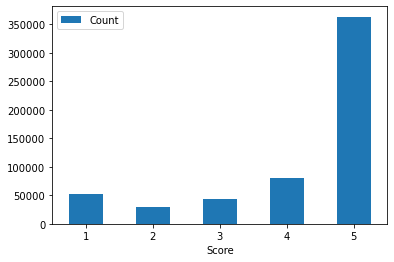

In [4]:
scores.plot.bar(x='Score', y='Count', rot=0)

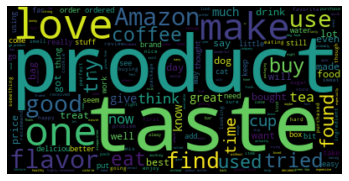

In [5]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [10]:
# scores > 3   -> Positive sentiment (+1)
# score < 3    -> negative sentiment (-1)
# remove scores of 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

<ipython-input-10-27bd85c602b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)


In [7]:
# split df - positive and negative sentiment:positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]